# COP and COG estimation by linear regression
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the linear regression

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [16]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
 #               rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [17]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Sat Nov 27 14:30:27 2021 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [18]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

## Subject 150

In [23]:
fname_grf = os.path.join(path2, PDSinfo.Trial[150] + 'grf' + '.txt') 
fname_mkr = os.path.join(path2, PDSinfo.Trial[150] + 'mkr' + '.txt')
grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
print(fname_grf, grf.shape)
print(fname_mkr, mkr.shape)

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1grf.txt (6000, 21)
C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1mkr.txt (6000, 130)


Devemos calcular os coeficientes da equação que relaciona o COG com o COP

In [20]:
y=grf['COPNET_X']
x=mkr['COG_X']
t=mkr['Time']

In [21]:
x1=np.array(x[:-30]).reshape(-1,1)
y1=np.array(y[30:]).reshape(-1,1)
for nt in range(1,30):
    x1=np.hstack((x1,np.array(x[nt:-30+nt]).reshape(-1,1)))
N=len(x1)
f1=np.hstack((x1,np.ones((N,1))))
c,d,_,_=np.linalg.lstsq(x1,y1,rcond=None)

Após calcular os coeficientes, plotamos os gráficos, tanto do COP real quanto estimado, sendo o estimado dado por:

Text(0, 0.5, 'COP')

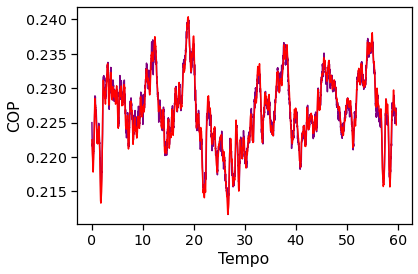

In [22]:
yext=x1@c
plt.plot(t[:-30],yext,marker='', color='purple',linestyle='-')
plt.plot(t[:-30],y[30:],marker='',color='red',linestyle='-')
plt.xlabel('Tempo')
plt.ylabel('COP')

## Subject 44

First is taken the data 

In [25]:
fname_grf2=os.path.join(path2,PDSinfo.Trial[44]+'grf'+'.txt')
fname_mkr2=os.path.join(path2,PDSinfo.Trial[44]+'mkr'+'.txt')
grf2=pd.read_csv(fname_grf2,delimiter='\t',header=0,engine='c')
mkr2=pd.read_csv(fname_mkr2,delimiter='\t',header=0,engine='c')

It is necessary to give values to x, y and the time that will be used in the graphic

In [31]:
x2=mkr2['COG_X']
y2=grf2['COPNET_X']
t2=mkr2['Time']

Now we calculate the coeficients that will form the graphics

In [32]:
x22=np.array(x2[:-30]).reshape(-1,1)
y22=np.array(y2[30:]).reshape(-1,1)
for nt in range(1,30):
    x22=np.hstack((x22,np.array(x2[nt:-30+nt]).reshape(-1,1)))
N2=len(x22)
f2=np.hstack((x22,np.ones((N2,1))))
c2,d2,_,_=np.linalg.lstsq(x22,y22,rcond=None)

Now to get the graphic:

Text(0, 0.5, 'COP')

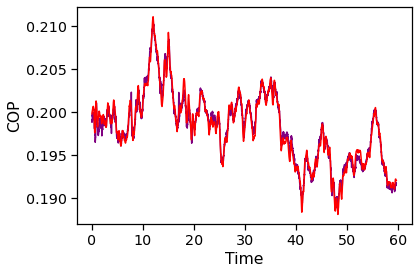

In [33]:
yestimative2=x22@c2
plt.plot(t2[:-30],yestimative2,marker='',color='purple',linestyle='-')
plt.plot(t2[:-30],y2[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 5

Getting data:

In [34]:
fname_grf3=os.path.join(path2,PDSinfo.Trial[5]+'grf'+'.txt')
fname_mkr3=os.path.join(path2,PDSinfo.Trial[5]+'mkr'+'.txt')
grf3=pd.read_csv(fname_grf3, delimiter='\t',header=0,engine='c')
mkr3=pd.read_csv(fname_mkr3, delimiter='\t',header=0,engine='c')

Get the values for x, y and time

In [38]:
x3=mkr3['COG_X']
y3=grf3['COPNET_X']
t3=mkr3['Time']

Get coeficients

In [43]:
x33=np.array(x3[:-30]).reshape(-1,1)
y33=np.array(y3[30:]).reshape(-1,1)
for nt in range(1,30):
    x33=np.hstack((x33,np.array(x3[nt:-30+nt]).reshape(-1,1)))
N3=len(x33)
f3=np.hstack((x33,np.ones((N3,1))))
c3,d3,_,_=np.linalg.lstsq(x33,y33,rcond=None)

Using graphics

Text(0, 0.5, 'COP')

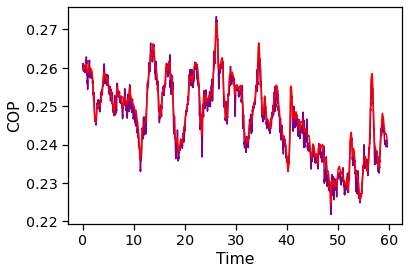

In [44]:
yestimative3=x33@c
plt.plot(t3[:-30],yestimative3,marker='',color='purple',linestyle='-')
plt.plot(t3[:-30],y3[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 3

Getting the data

In [45]:
fname_grf4=os.path.join(path2,PDSinfo.Trial[3]+'grf'+'.txt')
fname_mkr4=os.path.join(path2,PDSinfo.Trial[3]+'mkr'+'.txt')
grf4=pd.read_csv(fname_grf4,delimiter='\t',header=0,engine='c')
mkr4=pd.read_csv(fname_mkr4,delimiter='\t',header=0,engine='c')

Getting x, y and time:

In [46]:
x4=mkr4['COG_X']
y4=grf4['COPNET_X']
t4=mkr4['Time']

Calculating the coeficients:

In [47]:
x44=np.array(x4[:-30]).reshape(-1,1)
y44=np.array(y4[30:]).reshape(-1,1)
for nt in range(1,30):
    x44=np.hstack((x44,np.array(x4[nt:-30+nt]).reshape(-1,1)))
N4=len(x44)
f44=np.hstack((x44,np.ones((N4,1))))
c4,d4,_,_=np.linalg.lstsq(x44,y44,rcond=None)

Ploting the graphic

Text(0, 0.5, 'COP')

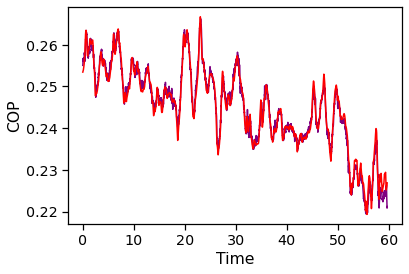

In [48]:
yestimative4=x44@c4
plt.plot(t4[:-30],yestimative4,marker='',color='purple',linestyle='-')
plt.plot(t4[:-30],y4[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 63

Getting data:

In [53]:
fname_grf5=os.path.join(path2,PDSinfo.Trial[63]+'grf'+'.txt')
fname_mkr5=os.path.join(path2,PDSinfo.Trial[63]+'mkr'+'.txt')
grf5=pd.read_csv(fname_grf5,delimiter='\t',header=0,engine='c')
mkr5=pd.read_csv(fname_mkr5,delimiter='\t',header=0,engine='c')

Get the values for x, y and time:

In [54]:
x5=mkr5['COG_X']
y5=grf5['COPNET_X']
t5=mkr5['Time']

Getting the values for the coeficients:

In [55]:
x55=np.array(x5[:-30]).reshape(-1,1)
y55=np.array(y5[30:]).reshape(-1,1)
for nt in range(1,30):
    x55=np.hstack((x55,np.array(x5[nt:-30+nt]).reshape(-1,1)))
N5=len(x55)
f5=np.hstack((x55,np.ones((N5,1))))
c5,d5,_,_=np.linalg.lstsq(x55,y55,rcond=None)

Ploting the graphic:

Text(0, 0.5, 'COP')

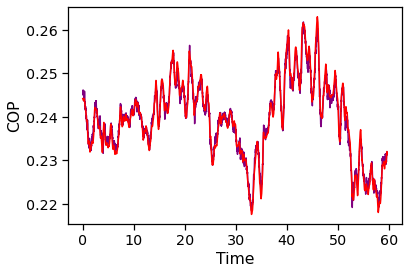

In [57]:
yestimative5=x55@c5
plt.plot(t5[:-30],yestimative5,marker='',color='purple',linestyle='-')
plt.plot(t5[:-30],y5[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 77

Getting data:

In [58]:
fname_grf6=os.path.join(path2,PDSinfo.Trial[77]+'grf'+'.txt')
fname_mkr6=os.path.join(path2,PDSinfo.Trial[77]+'mkr'+'.txt')
grf6=pd.read_csv(fname_grf6,delimiter='\t',header=0,engine='c')
mkr6=pd.read_csv(fname_mkr6,delimiter='\t',header=0,engine='c')

Get values for x,y and time:

In [59]:
x6=mkr6['COG_X']
y6=grf6['COPNET_X']
t6=mkr6['Time']

Get coeficient values:

In [60]:
x66=np.array(x6[:-30]).reshape(-1,1)
y66=np.array(y6[30:]).reshape(-1,1)
for nt in range(1,30):
    x66=np.hstack((x66,np.array(x6[nt:-30+nt]).reshape(-1,1)))
N6=len(x66)
f6=np.hstack((x66,np.ones((N6,1))))
c6,d6,_,_=np.linalg.lstsq(x66,y66,rcond=None)

Plot graphic:

Text(0, 0.5, 'COP')

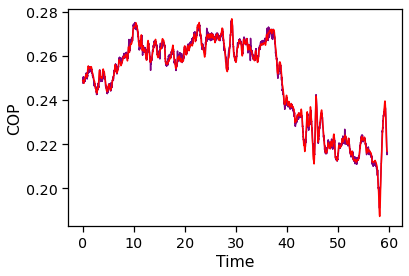

In [62]:
yestimative6=x66@c6
plt.plot(t6[:-30],yestimative6,marker='',color='purple',linestyle='-')
plt.plot(t6[:-30],y6[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 16

Getting data

In [63]:
fname_grf7=os.path.join(path2,PDSinfo.Trial[16]+'grf'+'.txt')
fname_mkr7=os.path.join(path2,PDSinfo.Trial[16]+'mkr'+'.txt')
grf7=pd.read_csv(fname_grf7,delimiter='\t',header=0,engine='c')
mkr7=pd.read_csv(fname_mkr7,delimiter='\t',header=0,engine='c')

Getting values for x,y and time

In [64]:
x7=mkr7['COG_X']
y7=grf7['COPNET_X']
t7=mkr7['Time']

Calculating coeficients:

In [66]:
x77=np.array(x7[:-30]).reshape(-1,1)
y77=np.array(y7[30:]).reshape(-1,1)
for nt in range(1,30):
    x77=np.hstack((x77,np.array(x7[nt:-30+nt]).reshape(-1,1)))
N7=len(x77)
f7=np.hstack((x77,np.ones((N7,1))))
c7,d7,_,_=np.linalg.lstsq(x77,y77,rcond=None)

Plot the graphic

Text(0, 0.5, 'COP')

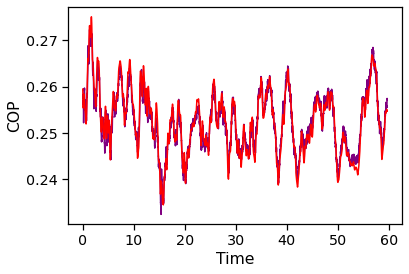

In [67]:
yestimative7=x77@c7
plt.plot(t7[:-30],yestimative7,marker='',color='purple',linestyle='-')
plt.plot(t7[:-30],y7[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 47

Get data:

In [70]:
fname_grf8=os.path.join(path2,PDSinfo.Trial[47]+'grf'+'.txt')
fname_mkr8=os.path.join(path2,PDSinfo.Trial[47]+'mkr'+'.txt')
grf8=pd.read_csv(fname_grf8,delimiter='\t',header=0,engine='c')
mkr8=pd.read_csv(fname_mkr8,delimiter='\t',header=0,engine='c')

Get values for x, y and time

In [71]:
x8=mkr8['COG_X']
y8=grf8['COPNET_X']
t8=mkr8['Time']

Calculate coeficients

In [72]:
x88=np.array(x8[:-30]).reshape(-1,1)
y88=np.array(y8[30:]).reshape(-1,1)
for nt in range(1,30):
    x88=np.hstack((x88,np.array(x8[nt:-30+nt]).reshape(-1,1)))
N8=len(x88)
f8=np.hstack((x88,np.ones((N8,1))))
c8,d8,_,_=np.linalg.lstsq(x88,y88,rcond=None)

Plot the graphic

Text(0, 0.5, 'COP')

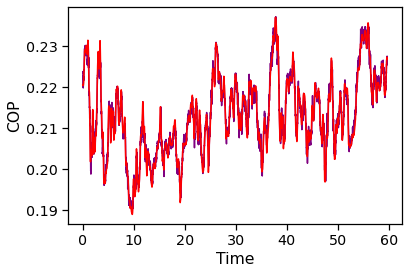

In [73]:
yestimative8=x88@c8
plt.plot(t8[:-30],yestimative8,marker='',color='purple',linestyle='-')
plt.plot(t8[:-30],y8[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 10

Get the data:

In [74]:
fname_grf9=os.path.join(path2,PDSinfo.Trial[10]+'grf'+'.txt')
fname_mkr9=os.path.join(path2,PDSinfo.Trial[10]+'mkr'+'.txt')
grf9=pd.read_csv(fname_grf9,delimiter='\t',header=0,engine='c')
mkr9=pd.read_csv(fname_mkr9,delimiter='\t',header=0,engine='c')

Get values for x, y and time

In [75]:
x9=mkr9['COG_X']
y9=grf9['COPNET_X']
t9=mkr9['Time']

Calculate the coeficient:

In [76]:
x99=np.array(x9[:-30]).reshape(-1,1)
y99=np.array(y9[30:]).reshape(-1,1)
for nt in range(1,30):
    x99=np.hstack((x99,np.array(x9[nt:-30+nt]).reshape(-1,1)))
N9=len(x99)
f9=np.hstack((x99,np.ones((N9,1))))
c9,d9,_,_=np.linalg.lstsq(x99,y99,rcond=None)

Plot graphics:

Text(0, 0.5, 'COP')

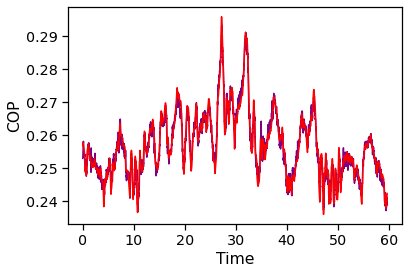

In [77]:
yestimative9=x99@c9
plt.plot(t9[:-30],yestimative9,marker='',color='purple',linestyle='-')
plt.plot(t9[:-30],y9[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 19

Get data:

In [82]:
fname_grf10=os.path.join(path2,PDSinfo.Trial[19]+'grf'+'.txt')
fname_mkr10=os.path.join(path2,PDSinfo.Trial[19]+'mkr'+'.txt')
grf10=pd.read_csv(fname_grf10,delimiter='\t',header=0,engine='c')
mkr10=pd.read_csv(fname_mkr10,delimiter='\t',header=0,engine='c')

Get values for x,y and time

In [83]:
x10=mkr10['COG_X']
y10=grf10['COPNET_X']
t10=mkr10['Time']

Calculate coeficient:

In [84]:
x100=np.array(x10[:-30]).reshape(-1,1)
y100=np.array(y10[30:]).reshape(-1,1)
for nt in range(1,30):
    x100=np.hstack((x100,np.array(x10[nt:-30+nt]).reshape(-1,1)))
N10=len(x100)
f10=np.hstack((x100,np.ones((N10,1))))
c10,d10,_,_=np.linalg.lstsq(x100,y100,rcond=None)

Plot graphic

Text(0, 0.5, 'COP')

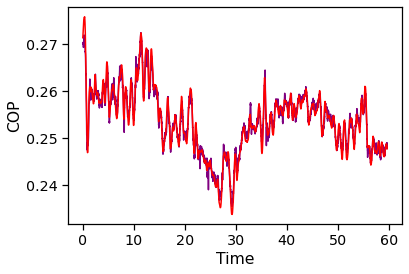

In [85]:
yestimative10=x100@c10
plt.plot(t10[:-30],yestimative10,marker='',color='purple',linestyle='-')
plt.plot(t10[:-30],y10[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

## Subject 12

Get data

In [86]:
fname_grf11=os.path.join(path2,PDSinfo.Trial[12]+'grf'+'.txt')
fname_mkr11=os.path.join(path2,PDSinfo.Trial[12]+'mkr'+'.txt')
grf11=pd.read_csv(fname_grf11,delimiter='\t',header=0,engine='c')
mkr11=pd.read_csv(fname_mkr11,delimiter='\t',header=0,engine='c')

Get values for x,y and time:

In [87]:
x11=mkr11['COG_X']
y11=grf11['COPNET_X']
t11=mkr11['Time']

Calculate coeficient:

In [88]:
x110=np.array(x11[:-30]).reshape(-1,1)
y110=np.array(y11[30:]).reshape(-1,1)
for nt in range(1,30):
    x110=np.hstack((x110,np.array(x11[nt:-30+nt]).reshape(-1,1)))
N11=len(x110)
f11=np.hstack((x110,np.ones((N11,1))))
c11,d11,_,_=np.linalg.lstsq(x110,y110,rcond=None)

Plot graphic

Text(0, 0.5, 'COP')

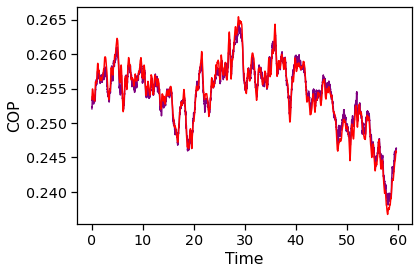

In [89]:
yestimative11=x110@c11
plt.plot(t11[:-30],yestimative11,marker='',color='purple',linestyle='-')
plt.plot(t11[:-30],y11[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')